In [1]:
import re
import pandas as pd
from collections import Counter
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from classes.utils import check_options, extract_option

BENCH =  "/home/cc/PHD/HealthBranches/results/results_QUIZ_bench_"
BASE =  "/home/cc/PHD/HealthBranches/results/results_QUIZ_baseline_"
MEDQA =  "/home/cc/PHD/HealthBranches/results-medqa/results_QUIZ_medqa_"

In [2]:
correct_q = pd.read_csv("/home/cc/PHD/HealthBranches/question_checked.csv")

correct_q['label'].values.shape

(1203,)

In [ ]:
def change_line(df_old, df_new):
    # Itera sulle righe del secondo CSV
    for _, row in df_new.iterrows():
        idx = row["ID"]  # ID nel secondo CSV che corrisponde all'indice del primo CSV
        label = row["label"]
        
        if label == "1":
            df_old.at[idx, "correct_option"] = row["correct_option"]
        elif label == "2":
            df_old.at[idx, "question"] = row["question"]

    return df_old

def evaluate_answers(file_path, model):
    df = pd.read_csv(file_path)
    subset_df = pd.read_csv("/home/cc/PHD/HealthBranches/question_checked.csv")

    df = df[~df['question'].isin(subset_df['question'])]

    df['correct_answer'] = df['real']
    accs = []

    for col in [c for c in df.columns if c.startswith(("zero_shot", "one_shot"))]:
        df[f'{col}_choice'] = df[col].apply(extract_option)
        df[f'{col}_is_correct'] = df[f'{col}_choice'] == df['correct_answer']
        accuracy = df[f'{col}_is_correct'].mean()
        print(f'Accuracy for {col}: {accuracy:.2%}')
        accs.append(accuracy)
    
    accs.insert(0, model)

    return accs

In [ ]:
extract_option("The correct answer is A.Given the presence")

In [ ]:
# _, nonelist = check_options(pd.read_csv(f"/home/cc/PHD/HealthBranches/results/results_quiz_baseline_mistral.csv"))
# print(len(nonelist))

# nonelist

In [7]:
models = ["mistral:7b", "gemma:7b", "gemma2:9b", "gemma3:4b", "llama3.1:8b", "qwen2.5:7b", 
          "phi4:14b", "llama2:7b", "Llama-3.3-70B-Instruct-Turbo-Free"]
bench = [evaluate_answers(f"{BENCH}{model}.csv", model) for model in models]
baseline = [evaluate_answers(f"{BASE}{model}.csv", model) for model in models]

total questions: 2912
Accuracy for zero_shot: 59.07%
Accuracy for zero_shot_rag: 69.85%
total questions: 2912
Accuracy for zero_shot: 64.56%
Accuracy for zero_shot_rag: 70.74%
total questions: 2912
Accuracy for zero_shot: 79.33%
Accuracy for zero_shot_rag: 82.01%
total questions: 3047
Accuracy for zero_shot: 55.04%
Accuracy for zero_shot_rag: 56.25%
total questions: 2912
Accuracy for zero_shot: 77.75%
Accuracy for zero_shot_rag: 79.05%
total questions: 2912
Accuracy for zero_shot: 77.92%
Accuracy for zero_shot_rag: 78.43%
total questions: 2912
Accuracy for zero_shot: 82.42%
Accuracy for zero_shot_rag: 83.38%
total questions: 2912
Accuracy for zero_shot: 20.74%
Accuracy for zero_shot_rag: 32.14%
total questions: 2912
Accuracy for zero_shot: 90.83%
Accuracy for zero_shot_rag: 88.26%
total questions: 2912
Accuracy for zero_shot: 84.58%
total questions: 2912
Accuracy for zero_shot: 82.38%
total questions: 2912
Accuracy for zero_shot: 92.20%
total questions: 3135
Accuracy for zero_shot: 67.

In [ ]:
print("### BASELINE ###")
for model in models:
    print(f"Results for {model}")
    evaluate_answers(f"{BASE}{model}.csv", model)

In [ ]:
print("### BENCH ###")
for model in models:
    print(f"Results for {model}")
    evaluate_answers(f"{BENCH}{model}.csv", model)

### BENCH all q ###
Results for mistral:7b
Accuracy for zero_shot: 47.36%
Accuracy for zero_shot_rag: 56.01%
Results for llama3.1:8b
Accuracy for zero_shot: 59.98%
Accuracy for zero_shot_rag: 62.04%
Results for llama2:7b
Accuracy for zero_shot: 20.22%
Accuracy for zero_shot_rag: 28.68%
Results for gemma:7b
Accuracy for zero_shot: 52.86%
Accuracy for zero_shot_rag: 57.96%
Results for gemma2:9b
Accuracy for zero_shot: 60.83%
Accuracy for zero_shot_rag: 65.61%
Results for qwen2.5:7b
Accuracy for zero_shot: 60.56%
Accuracy for zero_shot_rag: 62.92%
Results for phi4-mini:3.8b
Accuracy for zero_shot: 58.61%
Accuracy for zero_shot_rag: 65.05%
Results for gemma3:4b
Accuracy for zero_shot: 55.65%
Accuracy for zero_shot_rag: 57.21%
Results for llama3.3:70b
Accuracy for zero_shot: 64.50%
Accuracy for zero_shot_rag: 67.63%

### BENCH correct q ###
Results for mistral:7b
Accuracy for zero_shot: 47.10%
Accuracy for zero_shot_rag: 55.70%
Results for llama3.1:8b
Accuracy for zero_shot: 60.15%
Accuracy for zero_shot_rag: 61.77%
Results for llama2:7b
Accuracy for zero_shot: 20.12%
Accuracy for zero_shot_rag: 28.77%
Results for gemma:7b
Accuracy for zero_shot: 52.37%
Accuracy for zero_shot_rag: 57.16%
Results for gemma2:9b
Accuracy for zero_shot: 61.36%
Accuracy for zero_shot_rag: 65.39%
Results for qwen2.5:7b
Accuracy for zero_shot: 60.58%
Accuracy for zero_shot_rag: 62.48%
Results for phi4-mini:3.8b
Accuracy for zero_shot: 58.61%
Accuracy for zero_shot_rag: 64.86%
Results for gemma3:4b
Accuracy for zero_shot: 55.72%
Accuracy for zero_shot_rag: 56.87%
Results for llama3.3:70b
Accuracy for zero_shot: 65.71%
Accuracy for zero_shot_rag: 68.00%

### BENCH no q ###
Results for mistral:7b
Accuracy for zero_shot: 58.79%
Accuracy for zero_shot_rag: 69.44%
Results for llama3.1:8b
Accuracy for zero_shot: 77.44%
Accuracy for zero_shot_rag: 78.78%
Results for llama2:7b
Accuracy for zero_shot: 20.74%
Accuracy for zero_shot_rag: 32.18%
Results for gemma:7b
Accuracy for zero_shot: 64.56%
Accuracy for zero_shot_rag: 70.57%
Results for gemma2:9b
Accuracy for zero_shot: 79.43%
Accuracy for zero_shot_rag: 81.94%
Results for qwen2.5:7b
Accuracy for zero_shot: 77.78%
Accuracy for zero_shot_rag: 78.57%
Results for phi4-mini:3.8b
Accuracy for zero_shot: 74.90%
Accuracy for zero_shot_rag: 80.53%
Results for gemma3:4b
Accuracy for zero_shot: 69.57%
Accuracy for zero_shot_rag: 70.36%
Results for llama3.3:70b
Accuracy for zero_shot: 90.90%
Accuracy for zero_shot_rag: 88.53%

In [ ]:
print("### MEDQA ###")
for model in models:
    print(f"Results for {model}")
    evaluate_answers(f"{MEDQA}{model}.csv", model)

[['Llama-3.3-70B-Instruct-Turbo-Free', np.float64(0.9083104395604396), np.float64(0.882554945054945), np.float64(0.9701236263736264)], ['phi4:14b', np.float64(0.8241758241758241), np.float64(0.8337912087912088), np.float64(0.8245192307692307)], ['gemma2:9b', np.float64(0.7932692307692307), np.float64(0.820054945054945), np.float64(0.9220467032967034)], ['qwen2.5:7b', np.float64(0.7791895604395604), np.float64(0.7843406593406593), np.float64(0.9344093406593407)], ['llama3.1:8b', np.float64(0.7774725274725275), np.float64(0.790521978021978), np.float64(0.8303571428571429)], ['gemma:7b', np.float64(0.6456043956043956), np.float64(0.7074175824175825), np.float64(0.8238324175824175)], ['mistral:7b', np.float64(0.5906593406593407), np.float64(0.698489010989011), np.float64(0.8458104395604396)], ['gemma3:4b', np.float64(0.5503774204135214), np.float64(0.5625205119789958), np.float64(0.6704944178628389)], ['llama2:7b', np.float64(0.20741758241758243), np.float64(0.32142857142857145), np.float6

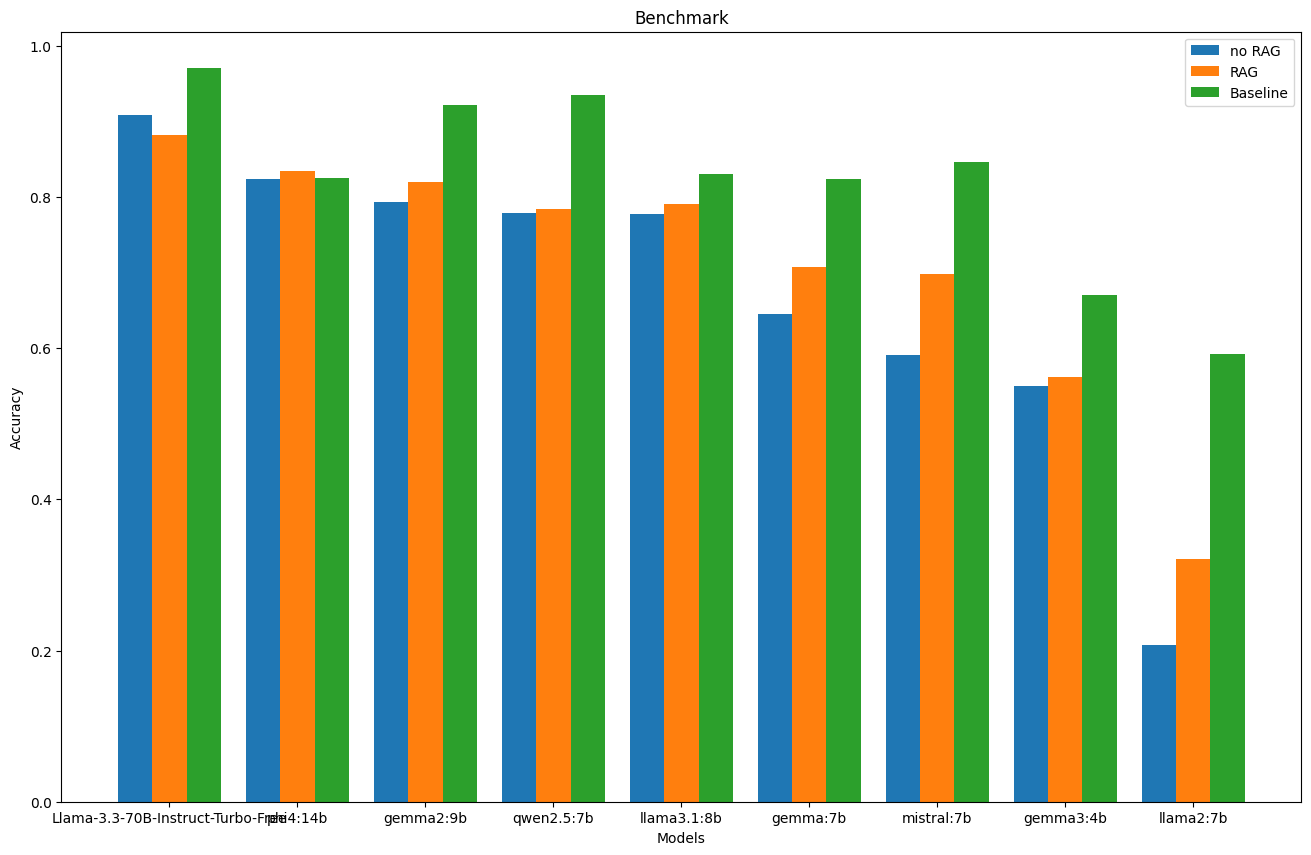

In [5]:
def show_chart(bench, baseline, bar1, bar2, bar3, xl, yl, title):
    # Creiamo un dizionario dalla lista baseline per una ricerca veloce
    baseline_dict = {item[0]: item[1] for item in baseline}

    # Uniamo le liste
    merged_list = [item + [baseline_dict[item[0]]] for item in bench if item[0] in baseline_dict]

    # Ordiniamo la lista in base al primo float (item[1])
    merged_list.sort(key=lambda x: x[1], reverse=True)

    print(merged_list)

    # Estrai le etichette e i valori
    labels = [x[0] for x in merged_list]
    values1 = [x[1] for x in merged_list]
    values2 = [x[2] for x in merged_list]
    values3 = [x[3] for x in merged_list]

    # Imposta la posizione delle barre con più spazio tra i gruppi
    x = np.arange(len(labels)) * 1.3  # Moltiplica per aumentare la distanza tra i gruppi
    width = 0.35  # Larghezza delle barre

    # Aumenta le dimensioni del grafico
    fig, ax = plt.subplots(figsize=(16, 10))
    bars1 = ax.bar(x - width, values1, width, label=bar1)
    bars2 = ax.bar(x, values2, width, label=bar2)
    bars3 = ax.bar(x + width, values3, width, label=bar3)    

    # Etichette e titolo
    ax.set_xlabel(xl)
    ax.set_ylabel(yl)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    # Mostra il grafico
    plt.show()

show_chart(bench, baseline, "no RAG", "RAG", "Baseline", "Models", "Accuracy", "Benchmark")

In [ ]:
import pandas as pd
import ast
import random
import string
from collections import Counter

def balance_correct_answer(csv_file, output_file):
    # Carica il file CSV
    df = pd.read_csv(csv_file)
    
    # Definisce le lettere per le opzioni (A, B, C, D, E)
    option_letters = list(string.ascii_uppercase[:5])
    
    # Conta la distribuzione attuale delle risposte corrette
    correct_counts = Counter(df['correct_option'])
    
    # Calcola il numero desiderato per ciascuna lettera
    target_count = len(df) // 5
    
    # Inizializza un dizionario per tenere traccia delle assegnazioni
    assigned_counts = {letter: 0 for letter in option_letters}
    
    # Funzione per ribilanciare la posizione della risposta corretta
    def rebalance(row):
        options = ast.literal_eval(row['options'].replace("['", '["').replace("']", '"]').replace("', '", '", "'))  # Converte la stringa in lista
        correct_letter = row['correct_option']
        correct_index = option_letters.index(correct_letter)
        correct_answer = options[correct_index]
        
        # Trova le lettere meno usate
        available_letters = [letter for letter in option_letters if assigned_counts[letter] < target_count]
        
        # Se tutte le lettere sono bilanciate, assegna a caso
        new_correct_letter = random.choice(available_letters) if available_letters else random.choice(option_letters)
        new_correct_index = option_letters.index(new_correct_letter)
        
        # Rimescola le risposte
        random.shuffle(options)
        
        # Sposta la risposta corretta nella nuova posizione
        options.remove(correct_answer)
        options.insert(new_correct_index, correct_answer)
        
        # Aggiorna il conteggio
        assigned_counts[new_correct_letter] += 1
        
        return pd.Series([str(options), new_correct_letter])
    
    # Applica la funzione a ogni riga
    df[['options', 'correct_option']] = df.apply(rebalance, axis=1)
    
    # Salva il nuovo file CSV
    df.to_csv(output_file, index=False)

    return df


df = pd.read_csv("/home/cc/PHD/HealthBranches/questions_pro/ultimate_questions_v3_full.csv")
print("Distribuzione prima:")
print(Counter(df["correct_option"]))

# # Esegui la funzione su un file di esempio
# bal_df = balance_correct_answer("/home/cc/PHD/HealthBranches/questions_pro/ultimate_questions_v3_full.csv", "/home/cc/PHD/HealthBranches/questions_pro/ultimate_questions_v3_full_balanced.csv")

# # df = balance_correct_options(df)
# print("Distribuzione dopo:")
# print(Counter(bal_df["correct_option"]))

# df.to_csv("/home/cc/PHD/HealthBranches/questions_pro/ultimate_questions_v3_full_balanced.csv", index=False)

In [ ]:
# Carica i CSV
df_dataset = pd.read_csv('/home/cc/PHD/HealthBranches/questions_pro/ultimate_questions_v3_full_balanced.csv')       # CSV completo delle domande
df_subset = pd.read_csv('/home/cc/PHD/HealthBranches/questions_to_check.csv')         # CSV con le domande da correggere
df_corrected = pd.read_csv('/home/cc/PHD/HealthBranches/question_checked.csv')    # CSV con le domande corrette; contiene la colonna "ID" (l'indice nel CSV subset)

# Resetta l'indice di df_subset per garantire che sia numerato da 0 a len(df_subset)-1
# df_subset.reset_index(drop=True, inplace=True)

mapping = {}
for _, row in df_corrected.iterrows():
    idx = int(row['ID'])
    if idx < len(df_subset):
        original_question = df_subset.loc[idx, 'question']
        mapping[original_question] = {
            'question': row['question'],
            'answer': row['answer'],
            'options': row['options'],
            'correct_option': row['correct_option'],
            'path': row['path']
        }
    else:
        print(f"Warning: ID {idx} non presente in df_subset")

# Funzione per aggiornare una riga del dataset, se la domanda è presente nel mapping
def update_row(row):
    corrections = mapping.get(row['question'])
    if corrections:
        row['question'] = corrections['question']
        row['answer'] = corrections['answer']
        row['options'] = corrections['options']
        row['correct_option'] = corrections['correct_option']
        row['path'] = corrections['path']
    return row

# Applica la funzione a ogni riga del dataset
df_dataset = df_dataset.apply(update_row, axis=1)
df_dataset.drop(columns=['answer'], inplace=True)

# Salva il dataset aggiornato
df_dataset.to_csv('dataset_updated.csv', index=False)
print("Dataset aggiornato salvato come 'dataset_updated.csv'")